<a href="https://colab.research.google.com/drive/1s5xQDbqyS9YRf6sitZuKWfIC1PEG-Cuo?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open This File In Colab "/></a>

<a href="https://docs.google.com/document/d/1nkh93XIn5eXZRb2JRhYXz0g1jYs91n1bFOy52Z3eGMs/edit?usp=sharing" target="_parent"><img src="https://imgs.search.brave.com/AU-48ttM9uMig8mqibqCvSIb-QSWw15OW-K5CNT5Ylg/rs:fit:847:225:1/g:ce/aHR0cHM6Ly90c2Ux/Lm1tLmJpbmcubmV0/L3RoP2lkPU9JUC5u/eHlNVjVzMnV0OUVC/SFZrMWVFQnZ3QUFB/QSZwaWQ9QXBp" alt="Open This File In Google Docs " style="width:50px;height:50px;"/></a>


```
Access the report from here
```



#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#Data Preparation

In [ ]:
tweet_emo=pd.read_csv('/content/drive/MyDrive/Text Emotion Recognition/raw data/tweet_emotions.csv')
tweet_emo

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
tweet_emo.drop('tweet_id', axis=1, inplace=True)

In [ ]:
tweet_emo.rename(columns={'sentiment':'emotion'}, inplace=True)
tweet_emo.columns

Index(['emotion', 'content'], dtype='object')

In [ ]:
tweet_emo.emotion.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotion, dtype: int64

In [ ]:
np.where(tweet_emo['emotion']=='fun')[0][:5]

array([ 21,  41, 148, 165, 179])

In [ ]:
tweet_emo.iloc[21][1]

"Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore"

In [ ]:
tweet_emo.replace({'emotion':{'happiness':'happy', 'love':'happy', 'relief':'neutral', 'hate':'sad', 'anger':'sad', 'sadness':'sad', 'empty':'neutral', 'boredom': 'neutral', 'enthusiasm':'happy', 'fun':'happy'}}, inplace=True)

In [ ]:
tweet_emo.emotion.value_counts()

happy       11586
neutral     11170
worry        8459
sad          6598
surprise     2187
Name: emotion, dtype: int64

In [ ]:
tweet_emo.replace({'emotion':{'worry':'sad'}}, inplace=True)

In [ ]:
tweet_emo = tweet_emo[tweet_emo['emotion'].str.contains('neutral') == False].reset_index(drop=True)

In [ ]:
tweet_emo.emotion.value_counts()

sad      15057
happy    11586
Name: emotion, dtype: int64

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Text Emotion Recognition/raw data/training.csv')
# test=pd.read_csv('/content/drive/MyDrive/Text Emotion Recognition/test.csv')
test=pd.read_csv('/content/drive/MyDrive/Text Emotion Recognition/raw data/validation.csv')

In [ ]:
train

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [ ]:
test

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


In [ ]:
train.label.value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [ ]:
train.iloc[np.where(train.label==4)[0][124]][1]

4

In [ ]:
train.replace({'label':{0:'sad', 1:'happy', 2:'happy', 3:'sad', 4:'fear'}}, inplace=True)
test.replace({'label':{0:'sad', 1:'happy', 2:'happy', 3:'sad', 4:'fear'}}, inplace=True)

In [ ]:
train.replace({'emotion':{5:'re'}}, inplace=True)
test.replace({'emotion':{5:'re'}}, inplace=True)

In [ ]:
train.rename(columns={'label':'emotion'}, inplace=True)
test.rename(columns={'label':'emotion'}, inplace=True)

In [ ]:
test.emotion.value_counts()

happy    882
sad      825
fear     212
re        81
Name: emotion, dtype: int64

In [ ]:
train = train[train['emotion'].str.contains('fear|re') == False].reset_index(drop=True)
test = test[test['emotion'].str.contains('fear|re') == False].reset_index(drop=True)

In [ ]:
tweet_emo.rename(columns={'content':'text'}, inplace=True)

In [ ]:
tweet_emo.shape

(26643, 2)

In [ ]:
np.random.seed(0)
tweet_emo = tweet_emo.reindex(np.random.permutation(tweet_emo.index))
train_data = tweet_emo[:-2813]
test_data = tweet_emo[-2813:]

In [ ]:
train_data

,emotion,text
16330,sad,"Bank holiday in the UK, it's raining! Typical ..."
25524,sad,"@Parsnipzilla ohtays, it all makes sense now....."
3883,sad,@deadlyknitshade OOh but you soon get to meet...
14560,happy,@alivicwil She's so funny!!! I wish she were m...
8319,sad,Delayed flight San Diego to Las Vegas. Why do...
...,...,...
14810,sad,@heatxsink SCREAAAAAAAAAAAAAAAAAAAAAAAAAAAAAM ...
3529,sad,Weather sucks!!... It's raining again!!
18945,sad,@criminalminds out of commish for a few days ...
4614,happy,Licking chocolate crumbs off a Twirl wrapper l...


In [ ]:
train

,text,emotion
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
2,im grabbing a minute to post i feel greedy wrong,sad
3,i am ever feeling nostalgic about the fireplac...,happy
4,i am feeling grouchy,sad
...,...,...
13486,i just had a very brief time in the beanbag an...,sad
13487,i am now turning and i feel pathetic that i am...,sad
13488,i feel strong and good overall,happy
13489,i feel like this was such a rude comment and i...,sad


In [ ]:
test_data

,emotion,text
19802,happy,"haircut as short as possible, even change colo..."
12013,sad,ahhhhh fuck it..... none of my friends want to...
12125,sad,@nathanblevins Maybe next time. Can't be away...
8997,sad,I hate that you can't edit loose-in-the-tweeti...
9047,sad,@redbloc whats twhirl? I've some work to be do...
...,...,...
13123,sad,dont wanna go to mississppi!!!!!!!! UGH!! texa...
19648,happy,Enjoyed see'n everyone last night! even tho it...
9845,sad,"@MrJRGregory Im 20 - believe me, I've tried! I..."
10799,sad,The Matrix Online shuts down next month...wow....


In [ ]:
test

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sad
1,i feel like i am still looking at a blank canv...,sad
2,i feel like a faithful servant,happy
3,i am just feeling cranky and blue,sad
4,i can have for a treat or if i am feeling festive,happy
...,...,...
1702,im having ssa examination tomorrow in the morn...,sad
1703,i constantly worry about their fight against n...,happy
1704,i feel its important to share this info for th...,happy
1705,i truly feel that if you are passionate enough...,happy


In [ ]:
train=pd.concat([train, train_data])
train.reset_index(inplace=True)
test=pd.concat([test,test_data])
test.reset_index(inplace=True)

In [ ]:
train.shape, test.shape

((37321, 3), (4520, 3))

In [ ]:
train.drop('level_0', axis=1, inplace=True)

In [ ]:
test.drop('index', axis=1, inplace=True)

In [ ]:
train.emotion.value_counts()

sad        21602
happy      18287
neutral    10309
Name: emotion, dtype: int64

In [ ]:
test.emotion.value_counts()

sad        1961
happy      1701
neutral     861
Name: emotion, dtype: int64

In [ ]:
import requests
API_URL = "https://datasets-server.huggingface.co/parquet?dataset=dair-ai/emotion"
def query():
    response = requests.request("GET", API_URL)
    return response.json()
data = query()

In [ ]:
data

{'parquet_files': [{'dataset': 'dair-ai/emotion',
   'config': 'split',
   'split': 'test',
   'url': 'https://huggingface.co/datasets/dair-ai/emotion/resolve/refs%2Fconvert%2Fparquet/split/emotion-test.parquet',
   'filename': 'emotion-test.parquet',
   'size': 128986},
  {'dataset': 'dair-ai/emotion',
   'config': 'split',
   'split': 'train',
   'url': 'https://huggingface.co/datasets/dair-ai/emotion/resolve/refs%2Fconvert%2Fparquet/split/emotion-train.parquet',
   'filename': 'emotion-train.parquet',
   'size': 1030739},
  {'dataset': 'dair-ai/emotion',
   'config': 'split',
   'split': 'validation',
   'url': 'https://huggingface.co/datasets/dair-ai/emotion/resolve/refs%2Fconvert%2Fparquet/split/emotion-validation.parquet',
   'filename': 'emotion-validation.parquet',
   'size': 127465},
  {'dataset': 'dair-ai/emotion',
   'config': 'unsplit',
   'split': 'train',
   'url': 'https://huggingface.co/datasets/dair-ai/emotion/resolve/refs%2Fconvert%2Fparquet/unsplit/emotion-train.parq

In [ ]:
df2= pd.read_parquet('/content/drive/MyDrive/Text Emotion Recognition/raw data/emotion-train (1).parquet')

In [ ]:
df2.label.value_counts()

1    140779
0    120989
Name: label, dtype: int64

In [ ]:
df2 = df2.loc[df2['label']!=2].drop_duplicates().reset_index(drop=True)
df2 = df2.loc[df2['label']!=3].drop_duplicates().reset_index(drop=True)
df2 = df2.loc[df2['label']!=4].drop_duplicates().reset_index(drop=True)
df2 = df2.loc[df2['label']!=5].drop_duplicates().reset_index(drop=True)

In [ ]:
df2.rename(columns=({'label':'emotion'}), inplace=True)

In [ ]:
df1

,text,emotion
0,not feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0
...,...,...
43124,burneded tummy,0
43125,ashleymshep yeah girl betta twitter miss jealo...,0
43126,kriscolvin would advise watching cinema sure e...,0
43127,mellieweena woah haha thank,1


In [ ]:
df2

,text,emotion
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i am one of those people who feels like going ...,1
...,...,...
261763,i do feel my body aching dying crying for slee...,0
261764,that was what i felt when i was finally accept...,1
261765,i just suddenly feel that everything was fake,0
261766,im feeling more eager than ever to claw back w...,1


In [ ]:
df=pd.concat([df1, df2])
df

,text,emotion
0,not feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0
...,...,...
261763,i do feel my body aching dying crying for slee...,0
261764,that was what i felt when i was finally accept...,1
261765,i just suddenly feel that everything was fake,0
261766,im feeling more eager than ever to claw back w...,1


#Data Preprocessing

In [ ]:
df

,text,emotion
0,not feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0
...,...,...
261763,i do feel my body aching dying crying for slee...,0
261764,that was what i felt when i was finally accept...,1
261765,i just suddenly feel that everything was fake,0
261766,im feeling more eager than ever to claw back w...,1


Lower Casing

In [ ]:
df['text']=df['text'].str.lower()

Punctuation

In [ ]:
import re
def fix_puntuation(text):
  return re.sub("`","'",text)
df['text']=df['text'].astype(str).apply(lambda x: fix_puntuation(x))

Contractions

In [ ]:
!pip install contractions --quiet
import contractions
def fix_contraction(text):
  return contractions.fix(text)
df['text']=df['text'].astype(str).apply(lambda x: fix_contraction(x))
df.head(5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.1 MB/s eta 0:00:00


,text,emotion
0,not feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0


Cleaning - Removing unwanted characters

In [ ]:
def cleaning(text):
  text=re.sub('[^a-zA-Z]|https?://\S+|www.\.\S+|<.*?|0-9>'," ",text) #except a-z, A-Z, 0-9 remaining all are are substituted as ' 
  text=re.sub('\s+',' ',text) #additional spaces are removed using this statement
  return text
df['text']=df['text'].astype(str).apply(lambda x: cleaning(x))
df.sample(10)

,text,emotion
87586,i should ve made you fight for me i should ve ...,0
243622,i am not regreting the move more so i regret t...,0
297409,i feel like it might be a little too rich to u...,1
106849,i decided i will go to a fish amp chips shop a...,0
165939,i cannot help but feel like everyone is superi...,1
169538,i feel she is being punished fairly but also i...,0
61128,i was feeling pretty discouraged about ministr...,0
90241,i feel so smart right now haha,1
78073,i feel that fake louboutin shoes christian lou...,0
126054,i feel i was successful with the cleaning aspect,1


Remove stopwords

In [ ]:
import nltk #Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
s=list(stopwords.words('english'))
s.remove('no')
s.remove('nor')
s.remove('not')
s=set(s)
def rem_s(text):
  return " ".join([word for word in text.split()if word not in s])

In [ ]:
df['text']=df['text'].astype(str).apply(lambda x: rem_s(x))
df.sample(10)

,text,emotion
265566,happy feel contented,1
212534,started feeling crappy symptoms fever chills h...,0
21450,not want work hour shift today would rather wh...,1
128027,sick dependent even partially someone makes fe...,0
26140,starting day little northern light,1
93063,not want ruin surprise taking red pond place f...,1
266429,know probably feel unimportant live outside,0
178996,cool feel talented actually,1
9856,could describe feeling like something moving i...,1
236728,feeling lethargic lonely,0


Abbrevations

In [ ]:
import csv
import re
data=pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/slang.txt', names=['abbr', 'fullform'], header=None, delimiter='=')
abbr=data['abbr'].tolist()
fullform=data['fullform'].tolist()
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    # print(dataFromFile)
    for _str in user_string:
      # File path which consists of Abbreviations.
      for i in range(len(abbr)):
        # Check if selected word matches short forms[LHS] in text file.
        if _str.upper() == abbr[i]:
          # If match found replace it with its appropriate phrase in text file.
          user_string[j] = fullform[i]
      j=j+1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)
df['text']=df['text'].astype(str).apply(lambda x: translator(x))
df.head(10)

,text,emotion
0,not feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0
5,feeling little burdened lately not sure,0
6,petronas years feel petronas performed well ma...,1
7,feel romantic,1
8,feel like make suffering seeing mean something,0
9,feel running divine experience expect type spi...,1


Missing values

In [ ]:
df.isna().sum()

text       0
emotion    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

Defining X and y

In [ ]:
# df['emotion'].replace({'happy':1,'neutral':0,'sad':2}, inplace=True)

In [ ]:
X=df['text']
y=df['emotion']

In [ ]:
df

,text,emotion
0,not feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0
...,...,...
304833,feel body aching dying crying sleep however mi...,0
304834,felt finally accepted bulgarian conservatorie ...,1
304835,suddenly feel everything fake,0
304836,feeling eager ever claw back went pear shaped ...,1


In [ ]:
# test = test.loc[test['emotion']!=0].drop_duplicates().reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=2401)

In [ ]:
train.shape, test.shape

((254539, 2), (28283, 2))

In [ ]:
train.reset_index(drop=True, inplace=True)

In [ ]:
test.reset_index(drop=True, inplace=True)

In [ ]:
train, test

(                                                     text  emotion
 0       carefully word blog posts amount criticism hea...        0
 1       cannot remember little mermaid feeling carefre...        1
 2       not feeling super well turns cold knocked next...        1
 3                 feel honored part group amazing talents        1
 4       think helping also began feel pretty lonely lo...        0
 ...                                                   ...      ...
 254534  feeling generally jaded nothing like full blow...        0
 254535  know feel shitty crappy regretful disorganized...        0
 254536  miss boo another note soready game come tonigh...        0
 254537                         started feel real handsome        1
 254538  feel midlife consumer market vastly ignored br...        0
 
 [254539 rows x 2 columns],
                                                     text  emotion
 0                                  feel incredibly weepy        0
 1                  

In [ ]:
train.to_csv('/content/drive/MyDrive/Text Emotion Recognition/train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Text Emotion Recognition/test.csv', index=False)

#Importing Data

In [4]:
train=pd.read_csv('/content/drive/MyDrive/Text Emotion Recognition/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Text Emotion Recognition/test.csv')
df=pd.concat([train, test])

In [5]:
df.shape

(282822, 2)

#Classical ML

Text Conversion

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
cv=CountVectorizer(lowercase=True,ngram_range=(1,1))

In [ ]:
X_ml=cv.fit_transform(df['text'])

In [ ]:
X_ml.shape

(282822, 79281)

In [ ]:
y=df.emotion

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ml,y,test_size=0.1,random_state=2401)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((254539, 79281), (28283, 79281), (254539,), (28283,))

Creating Model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()#Logistic Regression Model %76

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model=KNeighborsClassifier()#K-Nearest Neighbour Model %66

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model=DecisionTreeClassifier()#Decision Tree Model %69

In [ ]:
# from sklearn.svm import SVC
# model=SVC() #Support Vector Machine

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(activation='logistic', alpha=0.01, batch_size=64,
              early_stopping=True, hidden_layer_sizes=(128,),
              learning_rate='adaptive', max_iter=1000, shuffle=True) #78

Training Model

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', alpha=0.01, batch_size=64,
              early_stopping=True, hidden_layer_sizes=(128,),
              learning_rate='adaptive', max_iter=1000)

Prediction Model

In [ ]:
y_pred=model.predict(X_test)

Accuracy

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[12584,   610],
       [  715, 14374]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13194
           1       0.96      0.95      0.96     15089

    accuracy                           0.95     28283
   macro avg       0.95      0.95      0.95     28283
weighted avg       0.95      0.95      0.95     28283



In [ ]:
accuracy_score(y_test,y_pred)

0.9531520701481455

#DEEP LEARNING

In [ ]:
text=[]
for i in range(df.shape[0]):
  text.append(len(df.iloc[i][0].split()))

In [ ]:
max(text), min(text), np.mean(text)

(35, 1, 8.296231327436896)

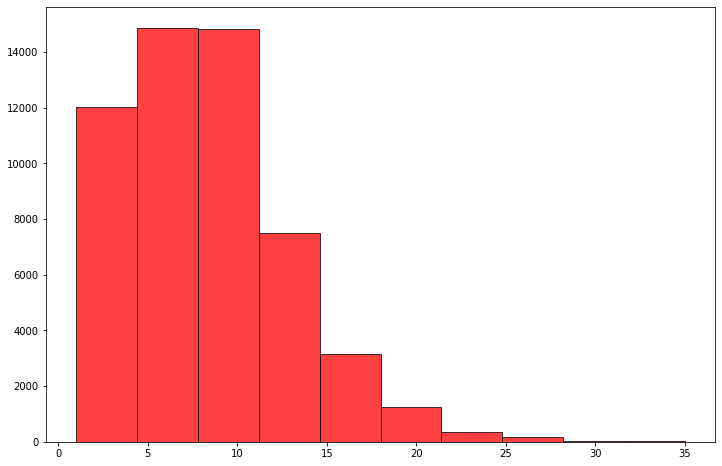

In [ ]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(text, bins=10, edgecolor='black', color="red", alpha=0.75)
# Show the plot
plt.show()

## *Tokenization*

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#parameters
vocab_size=50000
max_length=30
trunc_type='post'
oov_tok='<OOV>'

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(df['text'])

# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# Print the word index
print(f'word_index: {word_index}')
print()

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post', truncating=trunc_type, maxlen=max_length)

# Print a sample headline
i=5
print(f"sample headline: {df['text'][i]}")
print(f'padded sequence: {padded[i]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {padded.shape}')

number of words in word_index: 79301
word_index: {'<OOV>': 1, 'feel': 2, 'feeling': 3, 'not': 4, 'like': 5, 'really': 6, 'know': 7, 'time': 8, 'get': 9, 'would': 10, 'want': 11, 'people': 12, 'one': 13, 'little': 14, 'think': 15, 'day': 16, 'much': 17, 'still': 18, 'life': 19, 'even': 20, 'love': 21, 'going': 22, 'make': 23, 'could': 24, 'something': 25, 'way': 26, 'good': 27, 'no': 28, 'things': 29, 'go': 30, 'back': 31, 'pretty': 32, 'cannot': 33, 'bit': 34, 'need': 35, 'work': 36, 'see': 37, 'always': 38, 'today': 39, 'happy': 40, 'right': 41, 'say': 42, 'well': 43, 'got': 44, 'also': 45, 'never': 46, 'feels': 47, 'though': 48, 'feelings': 49, 'made': 50, 'around': 51, 'home': 52, 'help': 53, 'better': 54, 'sure': 55, 'days': 56, 'kind': 57, 'makes': 58, 'last': 59, 'new': 60, 'every': 61, 'lot': 62, 'look': 63, 'enough': 64, 'many': 65, 'quite': 66, 'someone': 67, 'http': 68, 'find': 69, 'anything': 70, 'take': 71, 'bad': 72, 'felt': 73, 'left': 74, 'friends': 75, 'come': 76, 'gett

In [7]:
X=pd.DataFrame(padded)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df.emotion, random_state=2401, test_size=0.1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((254539, 30), (28283, 30), (254539,), (28283,))

##ANN

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,"tanh",input_dim=X_train_dl.shape[1]))
model.add(tf.keras.layers.Dense(16,"relu"))
model.add(tf.keras.layers.Dense(7,"softmax"))
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["acc"])

epochs=101
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 16,validation_split=0.15, shuffle=True, callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    patience=10,
    restore_best_weights=True
)])

Epoch 1/101
2638/2638 [==============================] - 11s 4ms/step - loss: 1.1077 - acc: 0.4223 - val_loss: 1.1151 - val_acc: 0.4034
Epoch 2/101
2638/2638 [==============================] - 9s 3ms/step - loss: 1.0432 - acc: 0.4259 - val_loss: 1.1212 - val_acc: 0.3990
Epoch 3/101
2638/2638 [==============================] - 9s 3ms/step - loss: 1.0393 - acc: 0.4260 - val_loss: 1.1387 - val_acc: 0.3232
Epoch 4/101
2638/2638 [==============================] - 10s 4ms/step - loss: 1.0371 - acc: 0.4297 - val_loss: 1.1172 - val_acc: 0.3929
Epoch 5/101
2638/2638 [==============================] - 9s 4ms/step - loss: 1.0377 - acc: 0.4287 - val_loss: 1.1127 - val_acc: 0.4055
Epoch 6/101
2638/2638 [==============================] - 8s 3ms/step - loss: 1.0367 - acc: 0.4297 - val_loss: 1.1123 - val_acc: 0.3702
Epoch 7/101
2638/2638 [==============================] - 13s 5ms/step - loss: 1.0372 - acc: 0.4317 - val_loss: 1.1342 - val_acc: 0.4054
Epoch 8/101
2638/2638 [=============================

In [ ]:
model.evaluate(X_test_dl,y_test)

142/142 [==============================] - 0s 3ms/step - loss: 1.0346 - acc: 0.4342


[1.034591555595398, 0.4342338442802429]

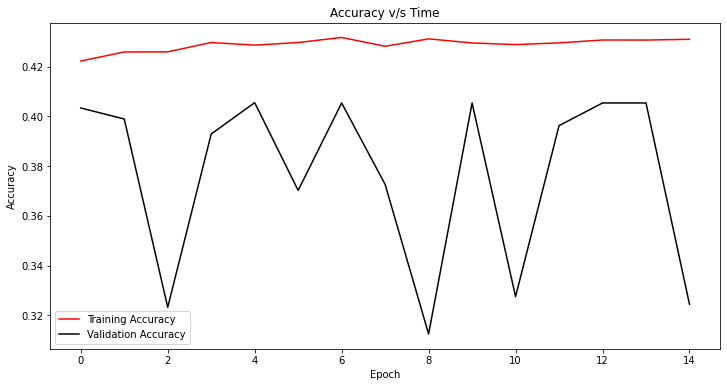

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(15),history.history['acc'],label='Training Accuracy',color='r')
plt.plot(range(15),history.history['val_acc'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##RNN

###LSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 10000, input_length=X_train_dl.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
# model.add(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate=0.002529), metrics=["acc"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 10000)         250000000 
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 15, 10000)        0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 15, 32)            1284224   
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 16,validation_split=0.15,callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000


In [ ]:
model.evaluate(X_test_dl,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

###Bi-LSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 10000, input_length=X_train_dl.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
# model.add(tf.keras.Bidirectional(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.1)))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate=0.002529), metrics=["acc"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 10000)         250000000 
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 15, 10000)        0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 15, 64)           2568448   
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 15, 32)           10368     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 16)               2624      
 nal)                                                 

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 64,validation_split=0.15,callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000


In [ ]:
model.evaluate(X_test_dl,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##CNN+LSTM-1

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(90000, 32, input_length=max_length))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Conv1D(56,5,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Conv1D(56,3,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2,from_logits=False),optimizer=keras.optimizers.Adam(learning_rate=0.002529),metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 32)            2880000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 15, 32)           0         
 ropout1D)                                                       
                                                                 
 conv1d_8 (Conv1D)           (None, 15, 56)            9016      
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 15, 56)           0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 15, 8)             2080      
                                                                 
 conv1d_9 (Conv1D)           (None, 15, 56)           

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 64, validation_split=0.1, callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
607/607 [==============================] - 38s 62ms/step - loss: -10.4267 - binary_accuracy: 0.4582 - val_loss: -14.1832 - val_binary_accuracy: 0.4556
Epoch 2/1000
380/607 [=================>............] - ETA: 15s - loss: -16.3091 - binary_accuracy: 0.4615

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_dl,y_test)

663/663 [==============================] - 6s 9ms/step - loss: 0.3245 - binary_accuracy: 0.7468


[0.32445940375328064, 0.746780514717102]

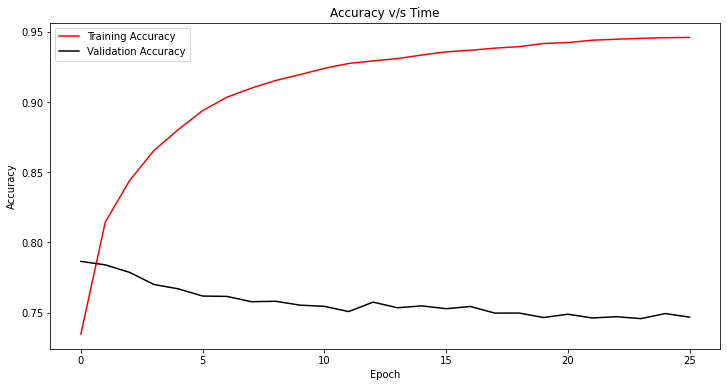

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##CNN+LSTM+BiLSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(20000, 32, input_length=X_train_dl.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Conv1D(256,7,activation='tanh',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Conv1D(16,7,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate=0.002529), metrics=["acc"])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 15, 32)            640000    
                                                                 
 spatial_dropout1d_54 (Spati  (None, 15, 32)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_36 (Conv1D)          (None, 15, 256)           57600     
                                                                 
 spatial_dropout1d_55 (Spati  (None, 15, 256)          0         
 alDropout1D)                                                    
                                                                 
 lstm_36 (LSTM)              (None, 15, 64)            82176     
                                                                 
 conv1d_37 (Conv1D)          (None, 15, 16)          

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 32,validation_split=0.15,callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
2638/2638 [==============================] - 724s 255ms/step - loss: 0.7626 - acc: 0.6393 - val_loss: 0.9583 - val_acc: 0.5625
Epoch 2/1000
2638/2638 [==============================] - 677s 257ms/step - loss: 0.6082 - acc: 0.7388 - val_loss: 0.9720 - val_acc: 0.5726
Epoch 3/1000
2638/2638 [==============================] - 650s 246ms/step - loss: 0.5478 - acc: 0.7722 - val_loss: 0.9922 - val_acc: 0.5602
Epoch 4/1000
2638/2638 [==============================] - 645s 245ms/step - loss: 0.5057 - acc: 0.7944 - val_loss: 1.0314 - val_acc: 0.5463
Epoch 5/1000
2638/2638 [==============================] - 668s 253ms/step - loss: 0.4730 - acc: 0.8097 - val_loss: 1.0596 - val_acc: 0.5589
Epoch 6/1000
2638/2638 [==============================] - 651s 247ms/step - loss: 0.4428 - acc: 0.8247 - val_loss: 1.1062 - val_acc: 0.5456
Epoch 7/1000
2638/2638 [==============================] - 667s 253ms/step - loss: 0.4179 - acc: 0.8355 - val_loss: 1.1679 - val_acc: 0.5483
Epoch 8/1000
2638/26

In [ ]:
model.evaluate(X_test_dl,y_test)

142/142 [==============================] - 3s 24ms/step - loss: 0.9276 - acc: 0.6867


[0.9275878667831421, 0.686669647693634]

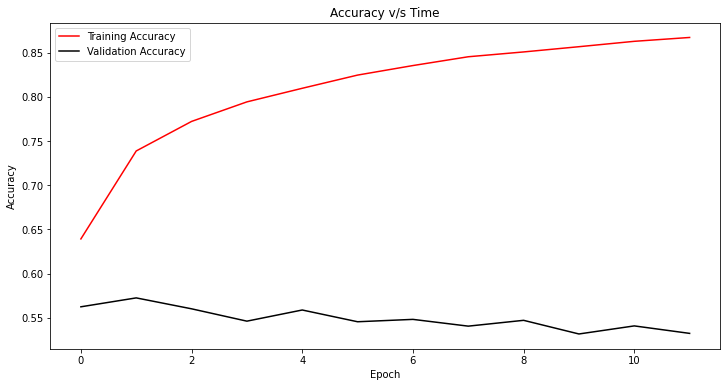

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(12),history.history['acc'],label='Training Accuracy',color='r')
plt.plot(range(12),history.history['val_acc'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##CNN+LSTM+GRU

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 32, input_length=X_train_dl.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Conv1D(256,7,activation='tanh',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Conv1D(16,7,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate=0.002529), metrics=["acc"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 32)            800000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 15, 32)           0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 256)           57600     
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 15, 256)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 128)          164352    
 nal)                                                            
                                                      

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 32,validation_split=0.15,callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
1319/1319 [==============================] - 277s 194ms/step - loss: 0.7755 - acc: 0.6337 - val_loss: 0.9545 - val_acc: 0.5645
Epoch 2/1000
1319/1319 [==============================] - 241s 182ms/step - loss: 0.5899 - acc: 0.7456 - val_loss: 0.9570 - val_acc: 0.5690
Epoch 3/1000
1319/1319 [==============================] - 244s 185ms/step - loss: 0.5044 - acc: 0.7926 - val_loss: 0.9974 - val_acc: 0.5656
Epoch 4/1000
1319/1319 [==============================] - 241s 183ms/step - loss: 0.4403 - acc: 0.8224 - val_loss: 1.0733 - val_acc: 0.5508
Epoch 5/1000
1319/1319 [==============================] - 240s 182ms/step - loss: 0.3902 - acc: 0.8482 - val_loss: 1.1670 - val_acc: 0.5355
Epoch 6/1000
1319/1319 [==============================] - 238s 180ms/step - loss: 0.3540 - acc: 0.8646 - val_loss: 1.2295 - val_acc: 0.5408
Epoch 7/1000
1319/1319 [==============================] - 241s 182ms/step - loss: 0.3242 - acc: 0.8776 - val_loss: 1.3724 - val_acc: 0.5361


In [ ]:
model.evaluate(X_test_dl,y_test)

142/142 [==============================] - 5s 36ms/step - loss: 0.9283 - acc: 0.6856


[0.9282578229904175, 0.6855624318122864]

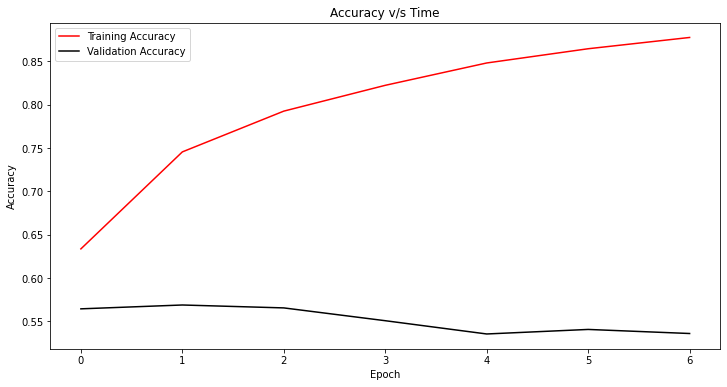

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(7),history.history['acc'],label='Training Accuracy',color='r')
plt.plot(range(7),history.history['val_acc'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##Hyperparameter tunimg using keras tuner

In [ ]:
!pip install keras-tuner --quiet

In [ ]:
import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time

LOG = f'{int(time.time())}'

<ipython-input-99-8e0a94976792>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def call_existing_code(vocab_size, embedding_dim, conv_units1, conv_units2, kernel_size, lstm_units1, lstm_units2, activation1, activation2, lr):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X_train_dl.shape[1]))
  model.add(tf.keras.layers.Conv1D(filters=conv_units1, kernel_size=kernel_size, activation=activation1, padding='same'))
  model.add(tf.keras.layers.LSTM(units=lstm_units1, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
  model.add(tf.keras.layers.Conv1D(filters=conv_units2, kernel_size=kernel_size, activation=activation2, padding='same'))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=lstm_units2, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
  model.add(tf.keras.layers.Conv1D(filters=conv_units2, kernel_size=kernel_size, activation=activation1, padding='same'))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=lstm_units1, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
  model.add(tf.keras.layers.LSTM(units=lstm_units2, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
  model.add(tf.keras.layers.Conv1D(filters=conv_units1, kernel_size=kernel_size, activation=activation2, padding='same'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=[tf.keras.metrics.BinaryAccuracy()])
  model.summary()
  return model


def build_model(hp):
  vocab_size=hp.Int("vocab_size", min_value=50000, max_value=100000, step=5000)
  embedding_dim=hp.Int("em_dim", min_value=4, max_value=128, step=16)
  conv_units1 = hp.Int("conv_units1", min_value=8, max_value=512, step=16)
  conv_units2 = hp.Int("conv_units2", min_value=16, max_value=256, step=16)
  kernel_size = hp.Int("kernel_size", min_value=3, max_value=10, step=1)
  lstm_units1 = hp.Int("lstm_units1", min_value=8, max_value=256, step=4)
  lstm_units2 = hp.Int("lstm_units2", min_value=2, max_value=512, step=8)
  activation1 = hp.Choice("activation1", ["relu", "tanh"])
  activation2 = hp.Choice("activation2", ["relu", "tanh"])

  # dropout = hp.Boolean("dropout")
  lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  # call existing model-building code with the hyperparameter values.
  model = call_existing_code(
      vocab_size=vocab_size, embedding_dim=embedding_dim, conv_units1=conv_units1, conv_units2=conv_units2, kernel_size=kernel_size, lstm_units1=lstm_units1, lstm_units2=lstm_units2, activation1=activation1, activation2=activation2, lr=lr
  )
  return model

tuner=RandomSearch(
    build_model,
    objective="val_binary_accuracy",
    max_trials=5,
    executions_per_trial=5,
    directory=LOG
)

tuner.search(
    x=X_train_dl,
    y=y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test_dl,y_test)
)

print(tuner.get_best_hyperparameters()[0].values)
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 4)             200000    
                                                                 
 conv1d_14 (Conv1D)          (None, 15, 8)             104       
                                                                 
 lstm_14 (LSTM)              (None, 15, 8)             544       
                                                                 
 conv1d_15 (Conv1D)          (None, 15, 16)            400       
                                                                 
 bidirectional_6 (Bidirectio  (None, 15, 4)            304       
 nal)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 15, 16)            208       
                                                      

KeyboardInterrupt: ignored

#**Final Model**

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(80000, 36, input_length=X_train.shape[1]))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(tf.keras.layers.MaxPooling1D(data_format='channels_first'))
model.add(tf.keras.layers.Conv1D(136,7,activation='relu',padding='same'))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(76, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Conv1D(192,5,activation='tanh',padding='same'))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(458, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
# model.add(tf.keras.layers.GlobalMaxPooling1D(data_format='channels_first', keepdims=True))
model.add(tf.keras.layers.Conv1D(192,5,activation='relu',padding='same'))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(76, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(tf.keras.layers.AveragePooling1D(data_format='channels_first'))
model.add(tf.keras.layers.LSTM(458, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(tf.keras.layers.GlobalAveragePooling1D(keepdims=True, data_format='channels_first'))
model.add(tf.keras.layers.Conv1D(136,7,activation='tanh',padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer=keras.optimizers.Adam(learning_rate=0.00091241),metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 36)            2880000   
                                                                 
 conv1d (Conv1D)             (None, 30, 136)           34408     
                                                                 
 lstm (LSTM)                 (None, 30, 76)            64752     
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 192)           73152     
                                                                 
 bidirectional (Bidirectiona  (None, 30, 916)          2385264   
 l)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 192)           879552    
                                                        

In [14]:
epochs=1000
history=model.fit(X_train, y_train, epochs=epochs, batch_size = 1024,validation_data=(X_test,y_test),callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
249/249 [==============================] - 283s 1s/step - loss: 0.0263 - binary_accuracy: 0.9794 - val_loss: 0.0385 - val_binary_accuracy: 0.9677
Epoch 2/1000
249/249 [==============================] - 278s 1s/step - loss: 0.0184 - binary_accuracy: 0.9861 - val_loss: 0.0395 - val_binary_accuracy: 0.9678
Epoch 3/1000
249/249 [==============================] - 277s 1s/step - loss: 0.0140 - binary_accuracy: 0.9896 - val_loss: 0.0446 - val_binary_accuracy: 0.9676
Epoch 4/1000
249/249 [==============================] - 275s 1s/step - loss: 0.0109 - binary_accuracy: 0.9920 - val_loss: 0.0501 - val_binary_accuracy: 0.9683
Epoch 5/1000
249/249 [==============================] - 270s 1s/step - loss: 0.0084 - binary_accuracy: 0.9942 - val_loss: 0.0554 - val_binary_accuracy: 0.9661
Epoch 6/1000
249/249 [==============================] - 271s 1s/step - loss: 0.0067 - binary_accuracy: 0.9955 - val_loss: 0.0648 - val_binary_accuracy: 0.9656
Epoch 7/1000
249/249 [========================

In [16]:
model.evaluate(X_test,y_test)

884/884 [==============================] - 63s 71ms/step - loss: 0.0758 - binary_accuracy: 0.9652


[0.07576515525579453, 0.9652441143989563]

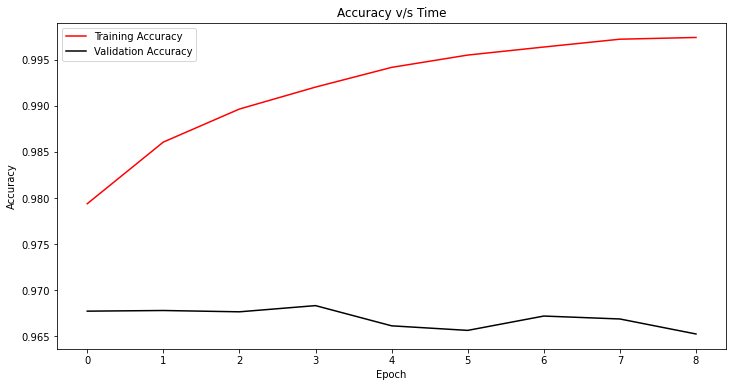

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(9),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(9),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

#Testing

In [25]:
y_pred=model.predict(X_test)

884/884 [==============================] - 56s 63ms/step


In [37]:
y_pred

array([[0.9864819 ],
       [0.01500596],
       [0.00280257],
       ...,
       [0.00207083],
       [0.9992729 ],
       [0.00399346]], dtype=float32)

In [38]:
for i in range(len(y_pred)):
  if y_pred[i]>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0
y_pred=np.array(y_pred).astype(int)
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13194
           1       0.97      0.97      0.97     15089

    accuracy                           0.97     28283
   macro avg       0.97      0.96      0.97     28283
weighted avg       0.97      0.97      0.97     28283



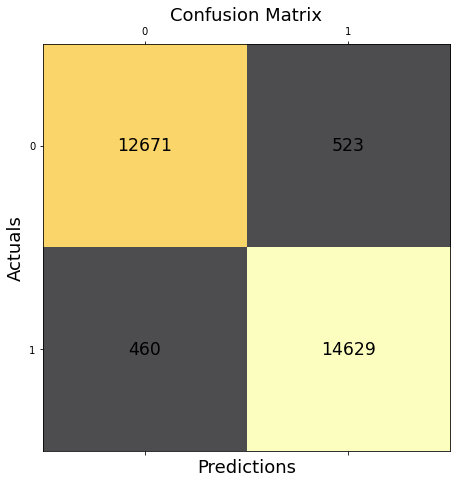

In [41]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap='inferno', alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [11]:
!pip list --format=freeze > requirements.txt

In [12]:
train.shape, test.shape

((254539, 2), (28283, 2))

In [13]:
import tensorflow
tensorflow.__version__

'2.11.0'